In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from pprint import pformat
import torch
from hloc.matchers import topicfm
from hloc import match_dense, matchers
from hloc.utils.base_model import dynamic_load


[2023/05/21 18:26:33 hloc WARNING] hloc now requires pycolmap>=0.3.0 but found pycolmap==0.2.0, please upgrade with `pip install --upgrade pycolmap`


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Running on {device}')

Running on cuda


In [13]:
match_conf = match_dense.confs['topicfm']
Model = dynamic_load(matchers, match_conf['model']['name'])
model = Model(match_conf['model']).eval().to(device)

In [14]:
path_image0 = Path('datasets/sacre_coeur/mapping/71295362_4051449754.jpg')
path_image1 = Path('datasets/sacre_coeur/mapping/93341989_396310999.jpg')
pred = match_dense.match(model, path_image0, path_image1, match_conf['preprocessing'])

F:\Hierarchical-Localization\hloc\matchers\..\..\third_party\TopicFM\src\models\utils\coarse_matching.py:202: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  [i_ids % data['hw0_c'][1], i_ids // data['hw0_c'][1]],
F:\Hierarchical-Localization\hloc\matchers\..\..\third_party\TopicFM\src\models\utils\coarse_matching.py:205: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a

In [15]:
from third_party.TopicFM.src.utils.plotting import make_matching_figure, error_colormap

In [16]:
def draw_matches(mkpts0, mkpts1, img0, img1, conf, path=None):
    thr = 5e-4
    thr = 0.5
    color = error_colormap(conf, thr, alpha=0.1)
    text = [
        f"image name",
        f"#Matches: {len(mkpts0)}",
    ]
    if path:
        make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text, path=path, dpi=150)
    else:
        return make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text)

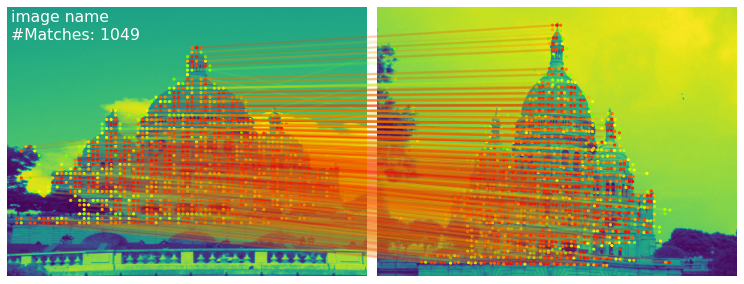

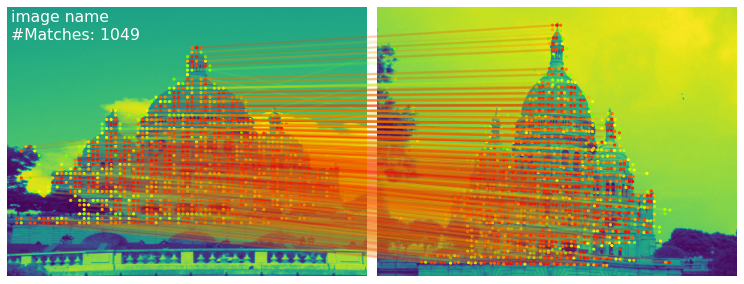

In [17]:
import numpy as np
mkpts0 = pred['keypoints0']
mkpts1 = pred['keypoints1']
img0 = pred['image0']
img1 = pred['image1']
if 'mconf' in pred.keys():
    mconf = pred['mconf']
else:
    mconf = np.ones(len(mkpts0))
path = './match.png'
draw_matches(mkpts0, mkpts1, img0, img1, mconf)